In [22]:
import matplotlib.pyplot as plt 
import numpy as np              
import sklearn.metrics as sklm  
import pandas as pd
import geopandas as gpd
import csv
from sklearn import metrics
from sklearn.cluster import DBSCAN
from esda.adbscan import ADBSCAN

In [23]:
data_filename = 'demo1.csv'
data = np.genfromtxt(data_filename,delimiter = ',')

In [24]:
res = []
for eps in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,8,10,15,20]:
    for min_samples in range(1,10):
        dbscantest = DBSCAN(eps = eps, min_samples = min_samples)
        dbscantest.fit(data)
        n_clusters = len([i for i in set(dbscantest.labels_) if i != -1])
        outliners = np.sum(np.where(dbscantest.labels_ == -1, 1,0))
        dbscangrouptest = dbscantest.labels_
        ##dbscan_silhouette_score = format(sklm.silhouette_score(data,dbscangrouptest), '.5f')
        ##dbscan_silhouette_score = metrics.silhouette_score(data, dbscangrouptest)
        res.append({'eps':eps,'min_samples':min_samples,'n_clusters':n_clusters,'outliners':outliners})

In [25]:
df = pd.DataFrame(res)
res

[{'eps': 0.1, 'min_samples': 1, 'n_clusters': 982, 'outliners': 0},
 {'eps': 0.1, 'min_samples': 2, 'n_clusters': 1, 'outliners': 981},
 {'eps': 0.1, 'min_samples': 3, 'n_clusters': 0, 'outliners': 983},
 {'eps': 0.1, 'min_samples': 4, 'n_clusters': 0, 'outliners': 983},
 {'eps': 0.1, 'min_samples': 5, 'n_clusters': 0, 'outliners': 983},
 {'eps': 0.1, 'min_samples': 6, 'n_clusters': 0, 'outliners': 983},
 {'eps': 0.1, 'min_samples': 7, 'n_clusters': 0, 'outliners': 983},
 {'eps': 0.1, 'min_samples': 8, 'n_clusters': 0, 'outliners': 983},
 {'eps': 0.1, 'min_samples': 9, 'n_clusters': 0, 'outliners': 983},
 {'eps': 0.2, 'min_samples': 1, 'n_clusters': 982, 'outliners': 0},
 {'eps': 0.2, 'min_samples': 2, 'n_clusters': 1, 'outliners': 981},
 {'eps': 0.2, 'min_samples': 3, 'n_clusters': 0, 'outliners': 983},
 {'eps': 0.2, 'min_samples': 4, 'n_clusters': 0, 'outliners': 983},
 {'eps': 0.2, 'min_samples': 5, 'n_clusters': 0, 'outliners': 983},
 {'eps': 0.2, 'min_samples': 6, 'n_clusters': 0,

In [26]:
epsilon = 10
minPts = 3
dbsc = DBSCAN(eps=epsilon, min_samples=minPts)
dbsc.fit(data)

dbscangroup = dbsc.labels_
dbscan_clustersresult = np.hstack((data,np.array([dbscangroup]).T))
dbscangroup

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0, -1,  2,  2,  2,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [27]:
datasave = pd.DataFrame(dbscan_clustersresult)
datasave.to_csv('raw_dbscan.csv')

In [28]:
datafin2 = pd.read_csv('raw_dbscan.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'dbscan.csv'

In [ ]:
gdf = gpd.read_file(f"zip://statistical-gis-boundaries-london.zip!statistical-gis-boundaries-london/ESRI/MSOA_2011_London_gen_MHW.shp")

In [ ]:
ppd = pd.merge(gdf, datafin2 ,left_on='MSOA11CD', right_on='id', how='inner').reset_index()

Text(0.5, 1.0, 'DBSCAN')

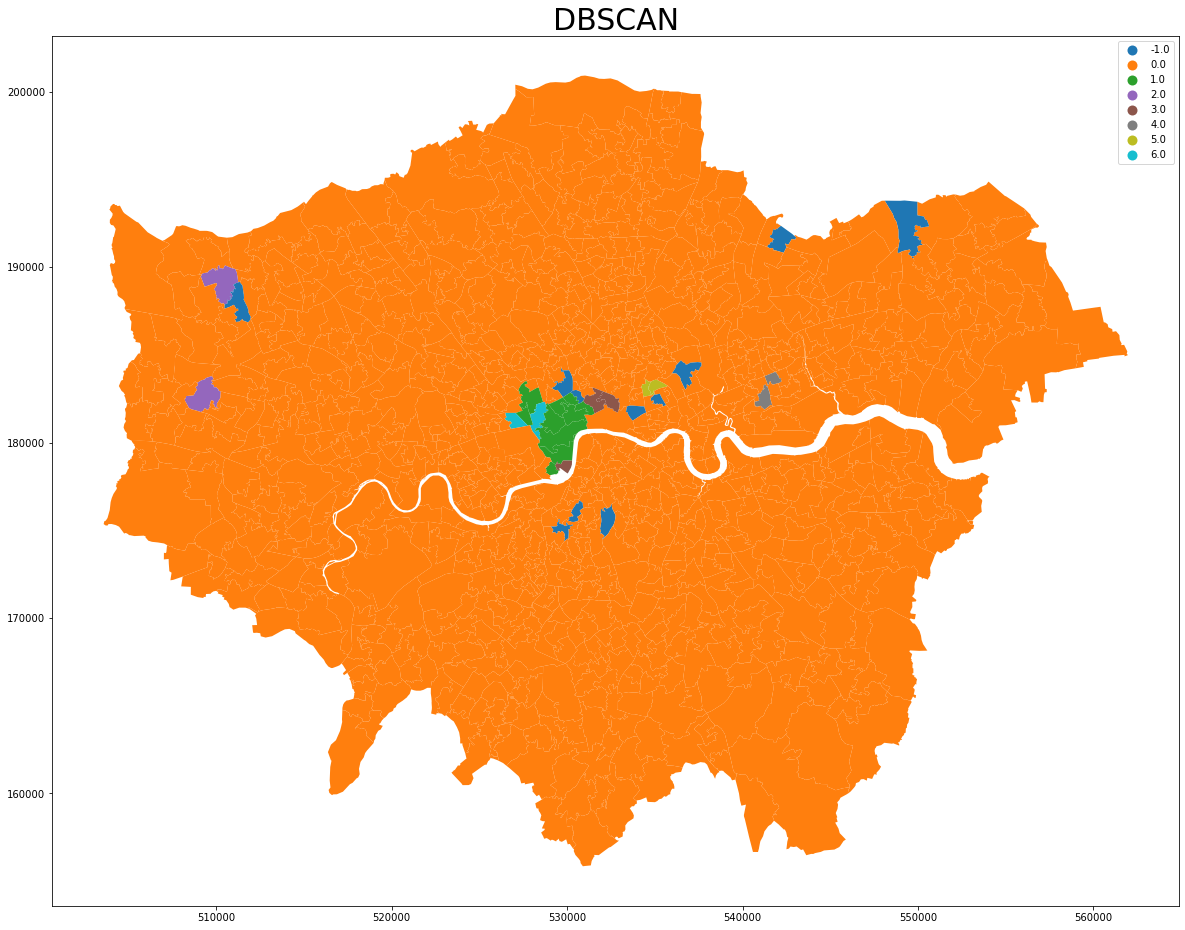

In [29]:
ppd.plot(column='group', categorical=True, legend=True, figsize=(24,16))
plt.title("DBSCAN",fontsize=30)

In [21]:
dbscan_silhouette_score_new = metrics.silhouette_score(data, dbscangroup)
dbscan_silhouette_score_new

0.08573836667414139